# **Práctica, visualización y Python**

Integrantes:

Carlos Felipe Parada Ramón - IDBanner:100126449

Juan Esteban Estrada - IDBanner: 100121443

In [22]:
# Importar librerías esenciales
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [23]:
# Configuración para ver gráficos de Matplotlib en Colab
%matplotlib inline

In [24]:
# Cargar el dataset
df = pd.read_csv('/content/UberDataset.csv')

In [25]:
# Mostrar las primeras filas para verificar la carga
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,"Friday, January 1, 2016","Friday, January 1, 2016",Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,"Saturday, January 2, 2016","Saturday, January 2, 2016",Business,Fort Pierce,Fort Pierce,5.0,NaN
2,"Saturday, January 2, 2016","Saturday, January 2, 2016",Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,"Tuesday, January 5, 2016","Tuesday, January 5, 2016",Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,"Wednesday, January 6, 2016","Wednesday, January 6, 2016",Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [26]:
# Convertir la columna de fecha a datetime
df['START_DATE'] = pd.to_datetime(df['START_DATE'], errors='coerce')

# **Visualización con Matplotlib**

Gráfico 1: Barras – Distancia Total por Categoría

Este gráfico muestra la suma de millas recorridas para cada categoría de viaje.

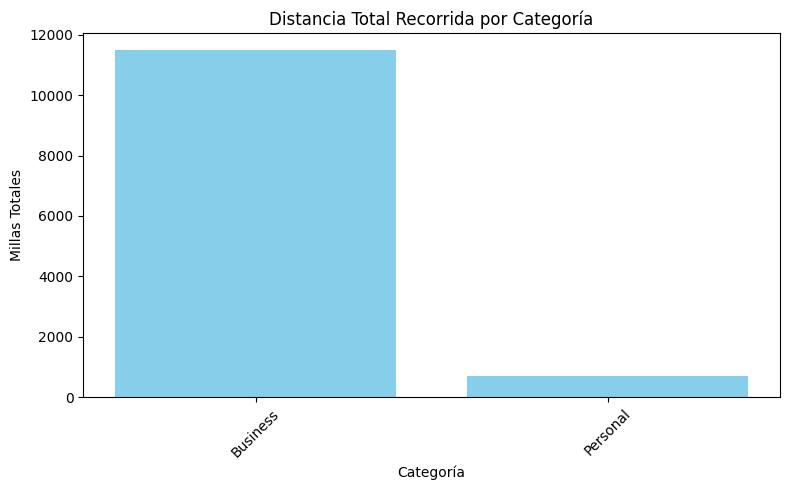

In [27]:
# Agrupar y sumar millas por categoría
miles_by_category = df.groupby('CATEGORY')['MILES'].sum().reset_index()

plt.figure(figsize=(8, 5))
plt.bar(miles_by_category['CATEGORY'], miles_by_category['MILES'], color='skyblue')
plt.xlabel('Categoría')
plt.ylabel('Millas Totales')
plt.title('Distancia Total Recorrida por Categoría')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Este gráfico permite identificar qué tipo de viaje (Business o Personal, por ejemplo) acumula más millas, lo cual es útil para definir estrategias de optimización y segmentación del servicio.

Gráfico 2: Línea – Evolución Temporal de las Millas

Muestra la tendencia diaria de millas recorridas.

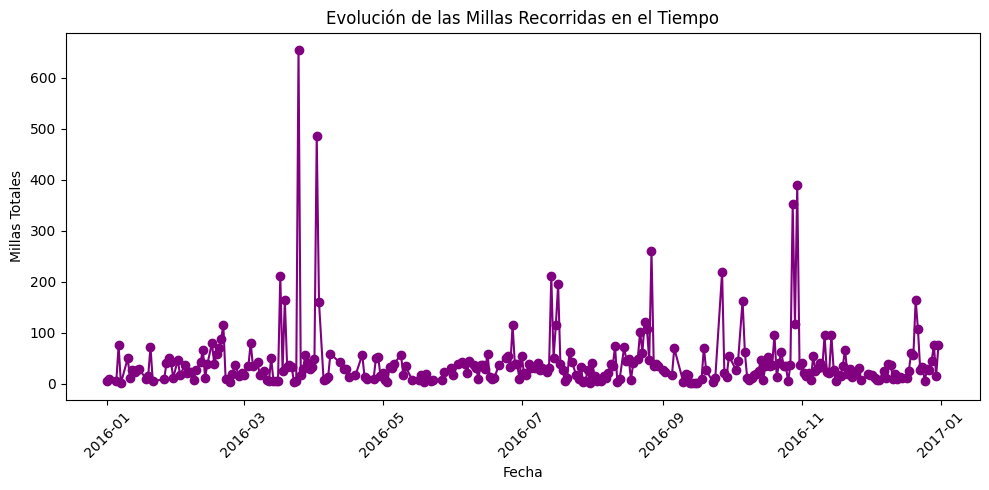

In [28]:
# Agrupar por fecha y sumar las millas
miles_by_date = df.groupby('START_DATE')['MILES'].sum().reset_index()

plt.figure(figsize=(10, 5))
plt.plot(miles_by_date['START_DATE'], miles_by_date['MILES'], marker='o', linestyle='-', color='purple')
plt.xlabel('Fecha')
plt.ylabel('Millas Totales')
plt.title('Evolución de las Millas Recorridas en el Tiempo')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Este gráfico permite visualizar picos o caídas en la actividad, identificar patrones estacionales y detectar días con comportamientos atípicos.

Gráfico 3: Histograma – Distribución de Millas

Permite observar la frecuencia de viajes según la distancia recorrida.

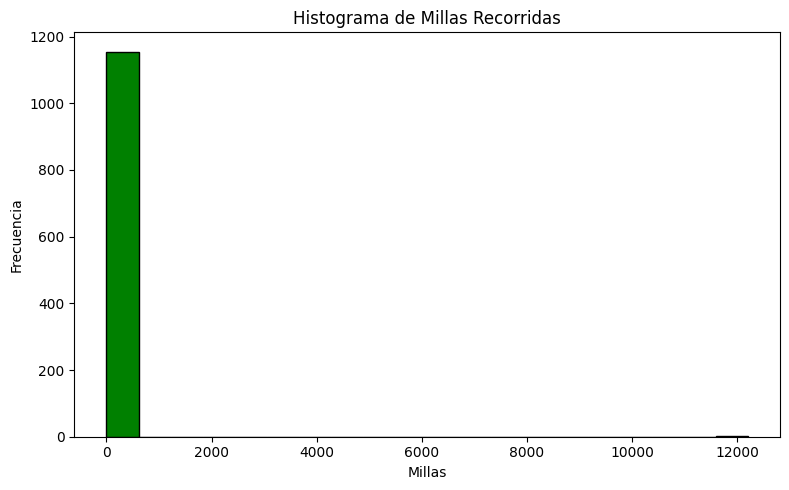

In [29]:
plt.figure(figsize=(8, 5))
plt.hist(df['MILES'], bins=20, color='green', edgecolor='black')
plt.xlabel('Millas')
plt.ylabel('Frecuencia')
plt.title('Histograma de Millas Recorridas')
plt.tight_layout()
plt.show()


El histograma ayuda a detectar concentraciones de viajes en determinados rangos de millas y posibles outliers, lo cual puede indicar la necesidad de limpiar o segmentar la información para análisis posterior.

Gráfico 4: Scatter Plot – Relación entre Millas y Fecha, Segmentado por Propósito


Este gráfico de dispersión muestra la relación entre las millas recorridas y la fecha de inicio, diferenciando los puntos según el propósito del viaje. Es útil para detectar tendencias y patrones en función de la finalidad del viaje a lo largo del tiempo.

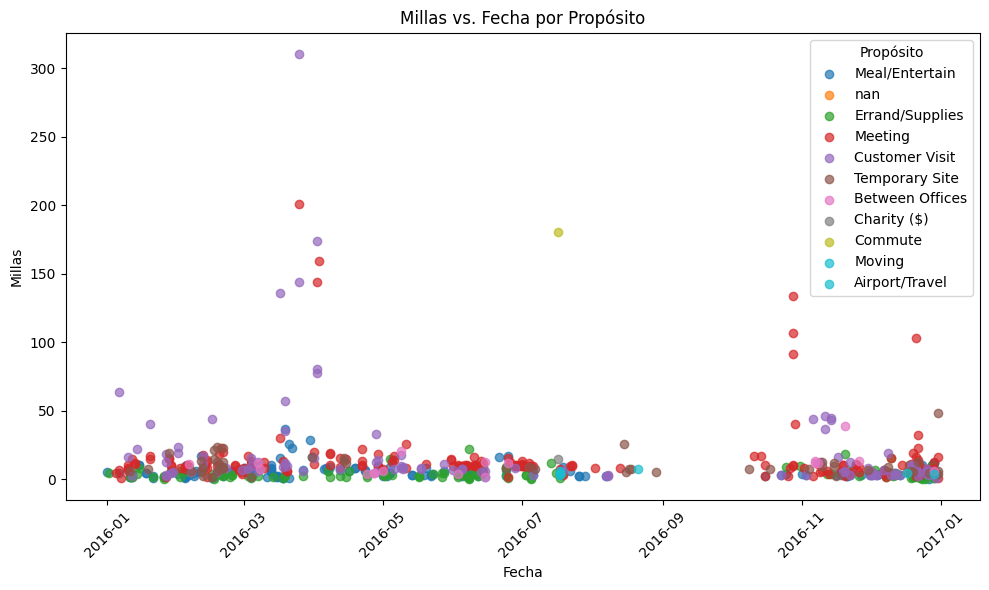

In [30]:
plt.figure(figsize=(10, 6))

# Obtener la lista de propósitos y asignar colores
purposes = df['PURPOSE'].unique()
colors = plt.cm.tab10(np.linspace(0, 1, len(purposes)))

# Graficar cada propósito con su color correspondiente
for purpose, color in zip(purposes, colors):
    subset = df[df['PURPOSE'] == purpose]
    plt.scatter(subset['START_DATE'], subset['MILES'], color=color, label=purpose, alpha=0.7)

plt.xlabel('Fecha')
plt.ylabel('Millas')
plt.title('Millas vs. Fecha por Propósito')
plt.legend(title='Propósito')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Se recorre cada propósito de viaje, filtrando el dataset y asignándole un color específico.

El gráfico permite observar cómo varían las millas recorridas a lo largo del tiempo para cada propósito, facilitando la detección de tendencias o comportamientos atípicos.

Gráfico 5: Pastel – Proporción de Viajes por Propósito


Visualiza la distribución porcentual de los distintos propósitos de viaje.

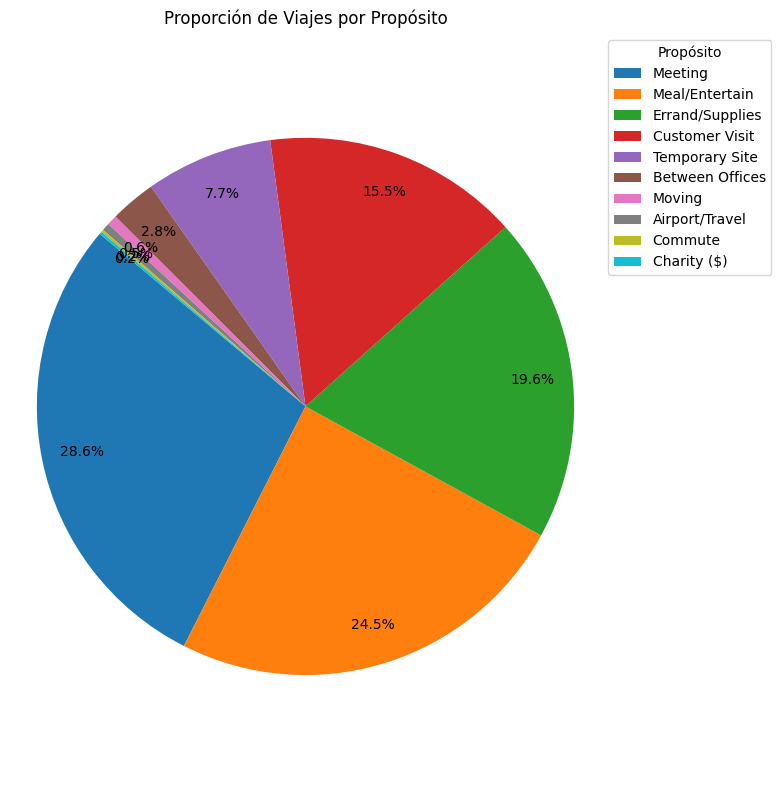

In [38]:
# Contar la cantidad de viajes por propósito
trips_by_purpose = df['PURPOSE'].value_counts()

plt.figure(figsize=(8, 8))
patches, texts, autotexts = plt.pie(trips_by_purpose,
                                    autopct='%1.1f%%',
                                    startangle=140,
                                    pctdistance=0.85)
plt.legend(patches, trips_by_purpose.index, title='Propósito', loc='upper right', bbox_to_anchor=(1.3, 1))
plt.title('Proporción de Viajes por Propósito')
plt.axis('equal')
plt.tight_layout()
plt.show()


Este gráfico ilustra la importancia relativa de cada propósito de viaje, lo cual puede influir en decisiones estratégicas de marketing y operaciones.

# **Visualización con Seaborn**

Gráfico 6: Count Plot – Frecuencia de Viajes por Categoría

Muestra la cantidad de viajes en cada categoría de forma visual.

<ipython-input-32-3b8979bdc3b9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='CATEGORY', palette='pastel')


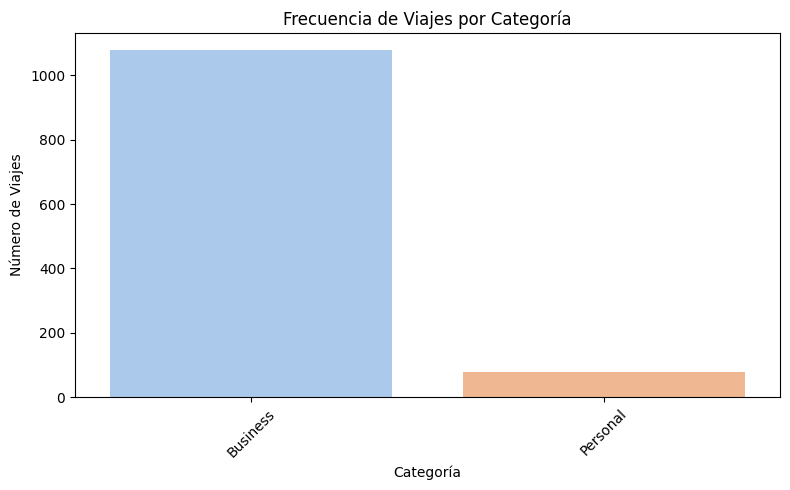

In [32]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='CATEGORY', palette='pastel')
plt.xlabel('Categoría')
plt.ylabel('Número de Viajes')
plt.title('Frecuencia de Viajes por Categoría')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Este gráfico complementa la visualización de la suma de millas y permite ver la distribución del número de viajes por categoría, lo cual es útil para análisis de volumen y demanda.

Gráfico 7: Box Plot – Distribución de Millas por Propósito


Identifica la mediana, los cuartiles y posibles outliers en la variable millas según el propósito.

<ipython-input-33-9611a89cd90e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='PURPOSE', y='MILES', palette='Set3')


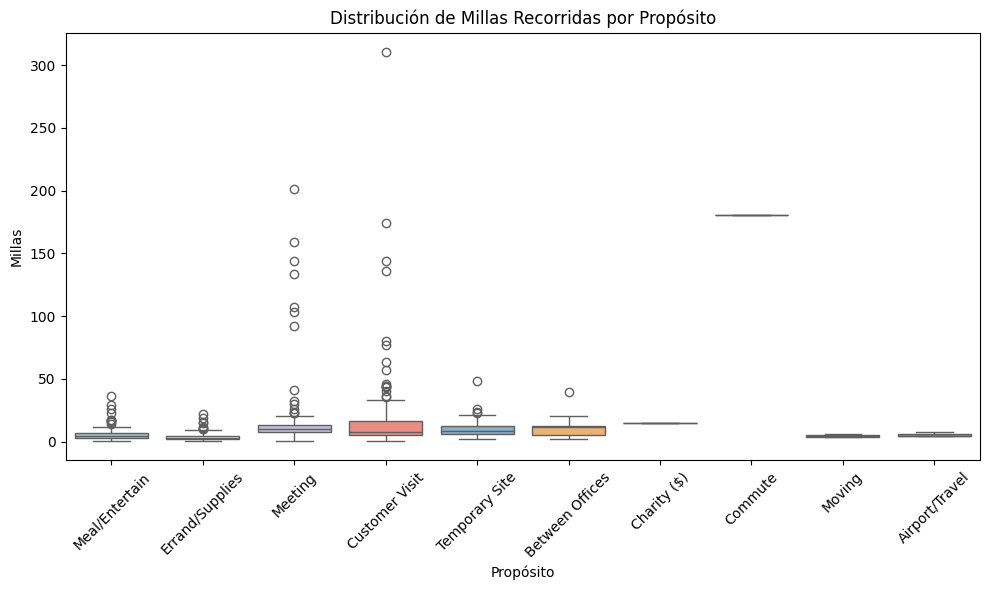

In [33]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='PURPOSE', y='MILES', palette='Set3')
plt.xlabel('Propósito')
plt.ylabel('Millas')
plt.title('Distribución de Millas Recorridas por Propósito')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Este gráfico es fundamental para identificar la dispersión de las millas en cada categoría de propósito y detectar valores atípicos que puedan requerir un análisis más profundo.

Gráfico 8: Violin Plot – Comparación de Millas por Categoría


Combina la información de un box plot con la densidad de la distribución

<ipython-input-34-31b0ca15edd3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='CATEGORY', y='MILES', palette='coolwarm')


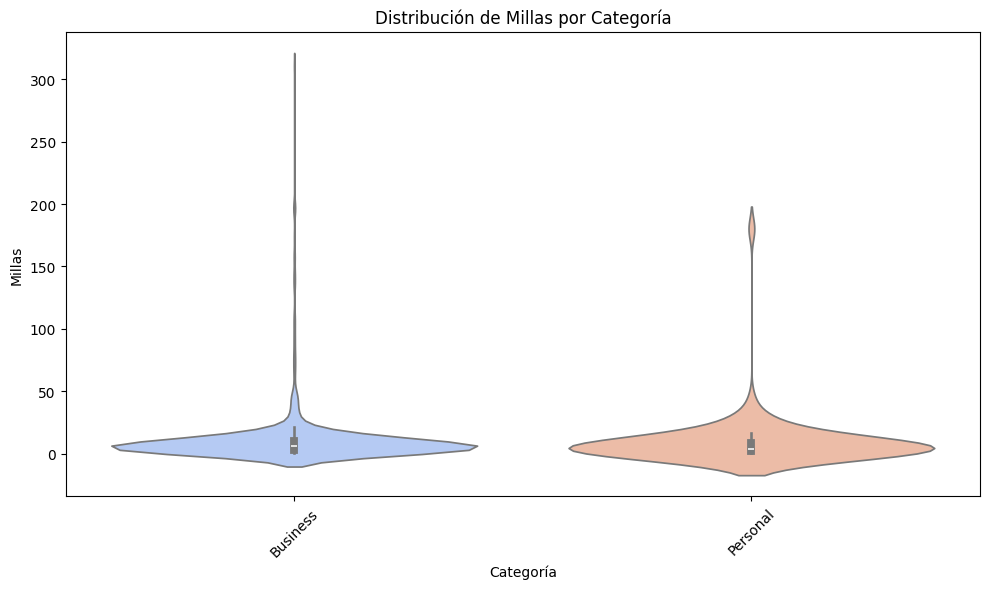

In [34]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='CATEGORY', y='MILES', palette='coolwarm')
plt.xlabel('Categoría')
plt.ylabel('Millas')
plt.title('Distribución de Millas por Categoría')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


El violin plot ofrece una visión más completa de la forma de la distribución de millas, lo que puede sugerir la presencia de múltiples subgrupos o comportamientos no lineales.

Gráfico 9: Line Plot – Evolución Promedio de Millas por Mes


Con una line plot observar la evolución de la media de millas recorridas por mes. Primero se extrae el mes de la fecha y se calcula la media.

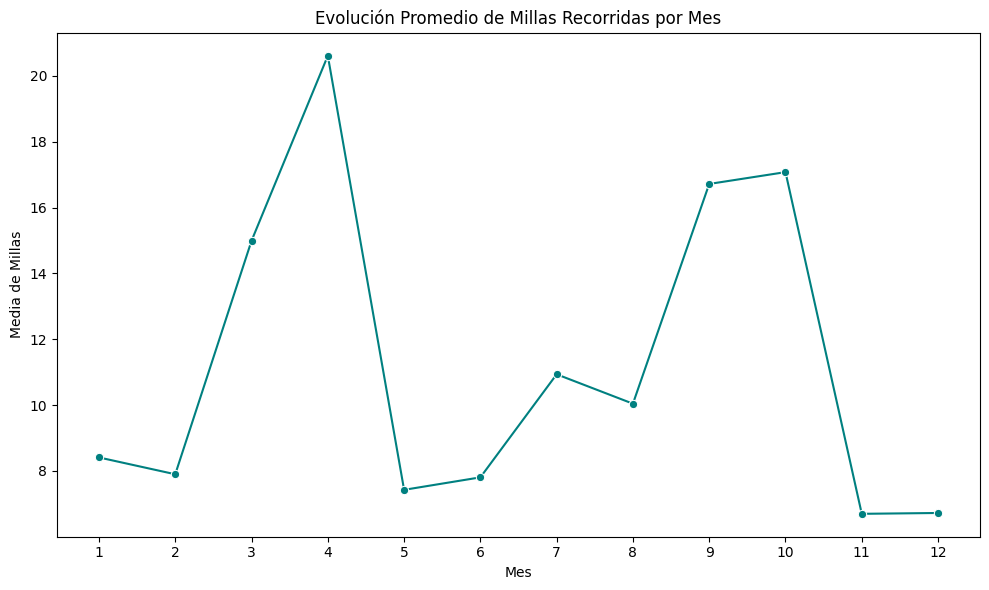

In [35]:
# Extraer el mes a partir de la columna START_DATE
df['Month'] = df['START_DATE'].dt.month

# Calcular la media de millas por mes
avg_miles_by_month = df.groupby('Month')['MILES'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_miles_by_month, x='Month', y='MILES', marker='o', color='teal')
plt.xlabel('Mes')
plt.ylabel('Media de Millas')
plt.title('Evolución Promedio de Millas Recorridas por Mes')
plt.xticks(avg_miles_by_month['Month'])
plt.tight_layout()
plt.show()


Este gráfico ayuda a identificar tendencias mensuales en el promedio de millas recorridas, lo que puede ser útil para detectar patrones estacionales o cambios en el comportamiento de los viajes.

Gráfico 10: Strip Plot – Distribución de Millas por Propósito


El strip plot permite visualizar la distribución de los datos de forma dispersa, ayudando a ver cómo se agrupan los valores de millas para cada propósito sin la sobreposición excesiva de puntos.

<ipython-input-36-e086cb9c6b70>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=df, x='PURPOSE', y='MILES', jitter=True, palette='Spectral')


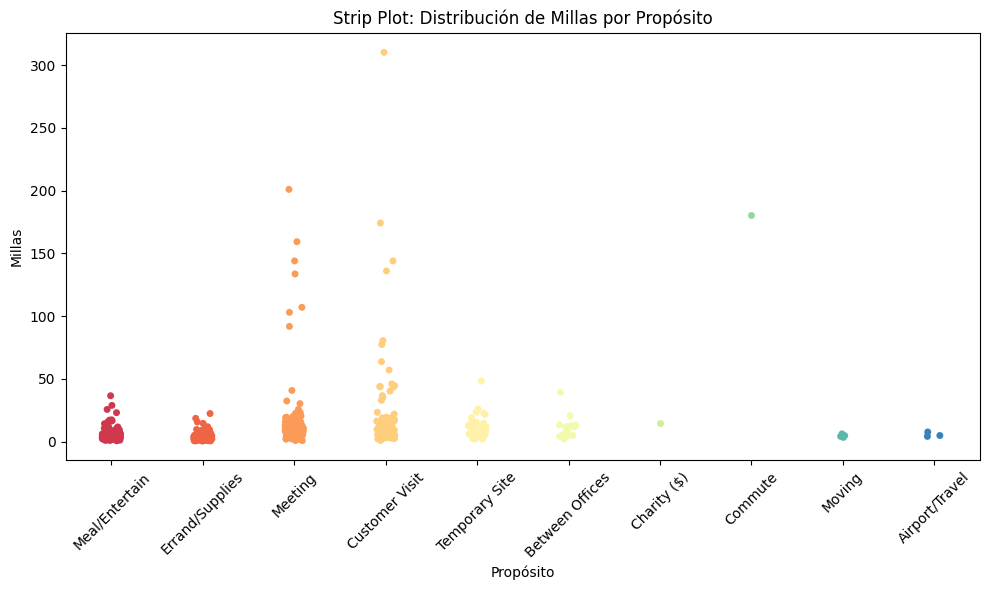

In [36]:
plt.figure(figsize=(10, 6))
sns.stripplot(data=df, x='PURPOSE', y='MILES', jitter=True, palette='Spectral')
plt.xlabel('Propósito')
plt.ylabel('Millas')
plt.title('Strip Plot: Distribución de Millas por Propósito')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Este gráfico ofrece una visión detallada de la variabilidad en la distancia recorrida para cada propósito de viaje, permitiendo detectar diferencias o patrones específicos entre los distintos tipos de propósito.

# **Conclusiones Generales**

Esta solución integral demuestra cómo utilizar dos potentes librerías de visualización en Python para transformar grandes volúmenes de datos en insights accionables. Cada uno de los 10 gráficos presenta una perspectiva distinta del comportamiento del dataset de Uber:

Los gráficos con Matplotlib permiten una configuración más personalizada y directa.

Los gráficos con Seaborn ofrecen una estética avanzada y facilitan la visualización de distribuciones y relaciones complejas.

Además, este análisis visual se puede complementar con técnicas de machine learning (por ejemplo, modelos de regresión, clustering o análisis de series temporales) para profundizar en la toma de decisiones estratégicas en la gestión del negocio.

Esta práctica no solo evidencia el dominio de las herramientas de visualización, sino que también resalta la importancia de interpretar y analizar los datos de forma que se puedan extraer conclusiones prácticas y relevantes para la organización.